In [3]:
require(data.table)
require(ggplot2)
setwd("~/WGS/SNPS/All_mylu/")

Loading required package: data.table
Loading required package: ggplot2


In [4]:
njeu=fread("NJ_EU2.mafs", sep=",")

Read 109424281 rows and 10 (of 10) columns from 6.376 GB file in 00:02:57


In [5]:
nyeu=fread("NY_EU.mafs")

Read 109424281 rows and 10 (of 10) columns from 6.372 GB file in 00:02:52


In [6]:
vteu=fread("VT_EU.mafs")

Read 109424281 rows and 10 (of 10) columns from 6.392 GB file in 00:02:54


In [7]:
colnames(njeu)=c("Scaffold", "Position", "Major", "Minor", "KnownMaf_E", "UnknownMaf_E", "nInd_E", "KnownMaf_U", "UnknownMaf_U", "nInd_U")

In [8]:
colnames(nyeu)=c("Scaffold", "Position", "Major", "Minor", "KnownMaf_E", "UnknownMaf_E", "nInd_E", "KnownMaf_U", "UnknownMaf_U", "nInd_U")

In [9]:
colnames(vteu)=c("Scaffold", "Position", "Major", "Minor", "KnownMaf_E", "UnknownMaf_E", "nInd_E", "KnownMaf_U", "UnknownMaf_U", "nInd_U")

In [14]:
head (vteu)

Scaffold,Position,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U
GL429767,38,A,G,0.000000,0.000002,11,0.000000,0.000001,11
GL429767,53,A,G,0.000000,0.000003,10,0.051681,0.051442,13
GL429767,54,G,T,0.059311,0.059309,12,0.000000,0.000002,13
GL429767,78,G,A,0.000000,0.000003,14,0.048179,0.048179,13
GL429767,83,G,T,0.000000,0.000001,14,0.050845,0.050654,12
GL429767,89,A,G,0.000000,0.000002,14,0.049695,0.049505,12


In [10]:
njeu$diff=abs(njeu$UnknownMaf_E-njeu$UnknownMaf_U)

In [13]:
njeusnps=njeu[diff>0,]

In [19]:
njeunuc=njeusnps[Scaffold!="AAPE02072785",]

In [11]:
nyeu$diff=abs(nyeu$UnknownMaf_E-nyeu$UnknownMaf_U)

In [14]:
nyeusnps=nyeu[diff>0,]

In [12]:
vteu$diff=abs(vteu$UnknownMaf_E-vteu$UnknownMaf_U)

In [15]:
vteusnps=vteu[diff>0,]

In [16]:
AAPE02072785nj=njeu[Scaffold=="AAPE02072785"& diff>0,]

In [68]:
AAPE02072785nj=AAPE02072785nj[order(-AAPE02072785nj$diff),] 
head(AAPE02072785nj)
NROW(AAPE02072785nj)

Scaffold,Position,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U,diff
AAPE02072785,2544,A,G,0.031234,0.030991,19,0.531726,0.531722,18,0.500731
AAPE02072785,9261,C,T,0.000000,0.000000,21,0.500000,0.500000,22,0.500000
AAPE02072785,3452,C,T,0.366587,0.366586,17,0.000000,0.000001,18,0.366585
AAPE02072785,3499,A,C,0.335005,0.335006,17,0.000000,0.000001,16,0.335005
AAPE02072785,20018,C,T,0.000000,0.000000,20,0.318452,0.318462,15,0.318462
AAPE02072785,18851,C,T,0.000000,0.000003,11,0.317760,0.317759,17,0.317756


[1] 580

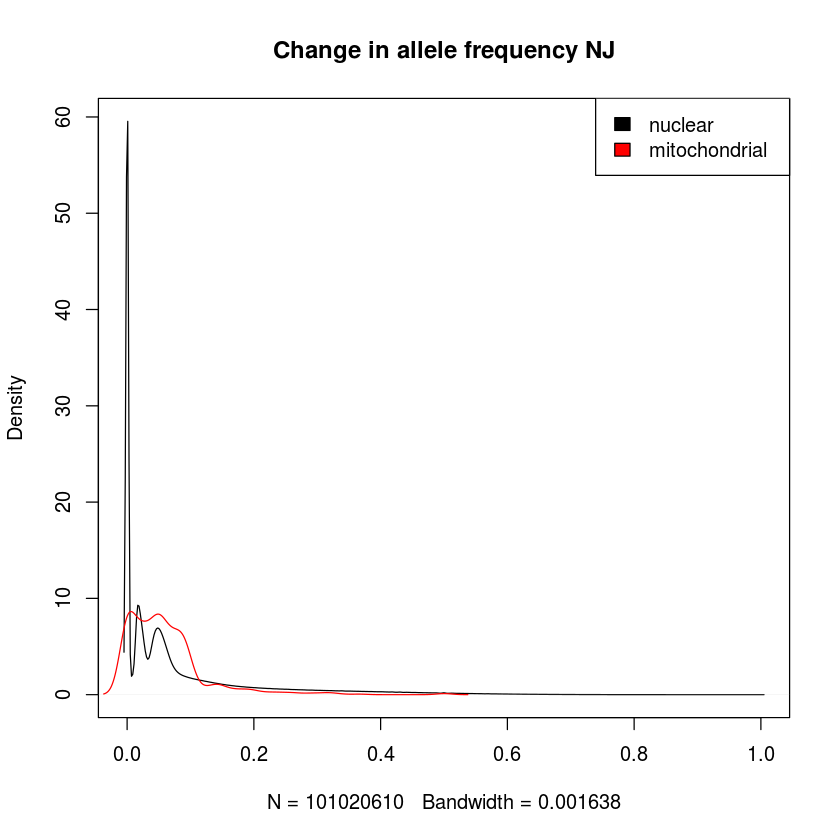

In [20]:
plot(density(njeunuc$diff), main="Change in allele frequency NJ")
     lines(density(AAPE02072785nj$diff), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

In [21]:
AAPE02072785ny=nyeu[Scaffold=="AAPE02072785"& diff>0,]

In [69]:
AAPE02072785ny=AAPE02072785ny[order(-AAPE02072785ny$diff),] 
head(AAPE02072785ny)
NROW(AAPE02072785ny)

Scaffold,Position,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U,diff
AAPE02072785,3515,A,G,0.314975,0.314978,19,0.060067,0.020071,13,0.294907
AAPE02072785,19154,T,C,0.349320,0.349321,9,0.239162,0.093847,7,0.255474
AAPE02072785,18742,C,T,0.245570,0.245568,10,0.000000,0.000005,5,0.245563
AAPE02072785,3148,T,C,0.000000,0.000001,15,0.232086,0.232083,12,0.232082
AAPE02072785,3470,T,C,0.233583,0.233586,20,0.065851,0.019229,13,0.214357
AAPE02072785,19900,A,T,0.212611,0.212613,16,0.029665,0.029277,19,0.183336


[1] 363

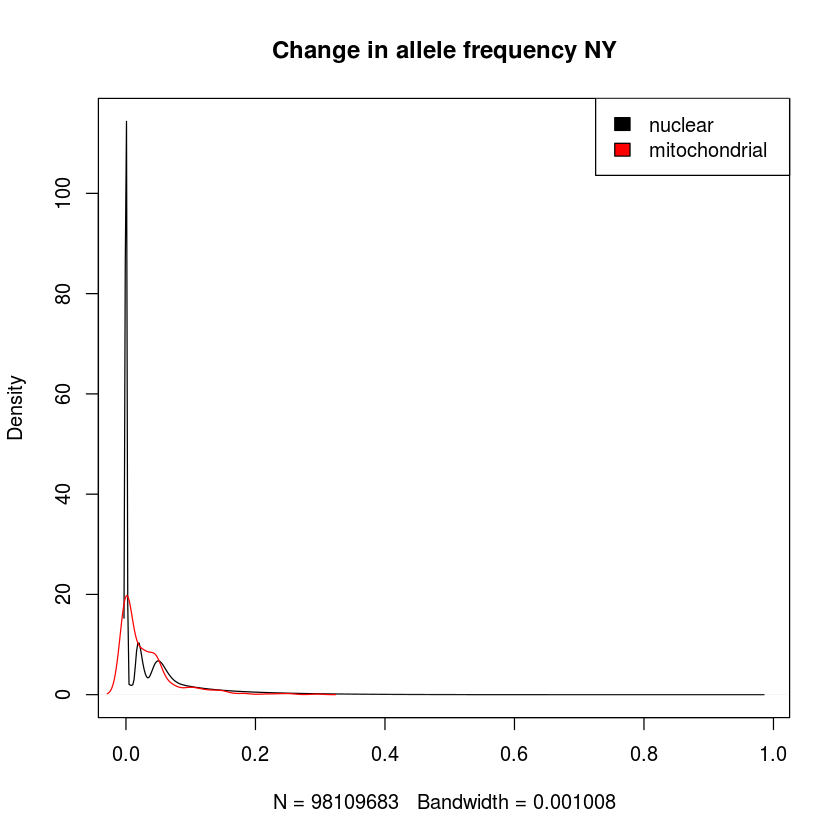

In [24]:
plot(density(nyeusnps$diff), main="Change in allele frequency NY")
     lines(density(AAPE02072785ny$diff), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

In [27]:
AAPE02072785vt=vteu[Scaffold=="AAPE02072785" ,]

In [28]:
NROW(AAPE02072785vt)

[1] 736

In [70]:
AAPE02072785vt=AAPE02072785vt[order(-AAPE02072785vt$diff),] 
head(AAPE02072785vt)
NROW(AAPE02072785vt)

Scaffold,Position,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U,diff
AAPE02072785,1436,T,C,0.000000,0.000000,19,0.365848,0.365849,9,0.365849
AAPE02072785,11664,C,T,0.259656,0.259656,27,0.620223,0.620223,22,0.360567
AAPE02072785,3499,A,C,0.304413,0.304412,27,0.652526,0.652524,12,0.348112
AAPE02072785,3452,C,T,0.340808,0.340810,27,0.650519,0.650517,12,0.309707
AAPE02072785,3465,G,A,0.196603,0.196603,27,0.491657,0.491651,12,0.295048
AAPE02072785,3508,T,C,0.000000,0.000000,27,0.247262,0.247260,10,0.247260


[1] 579

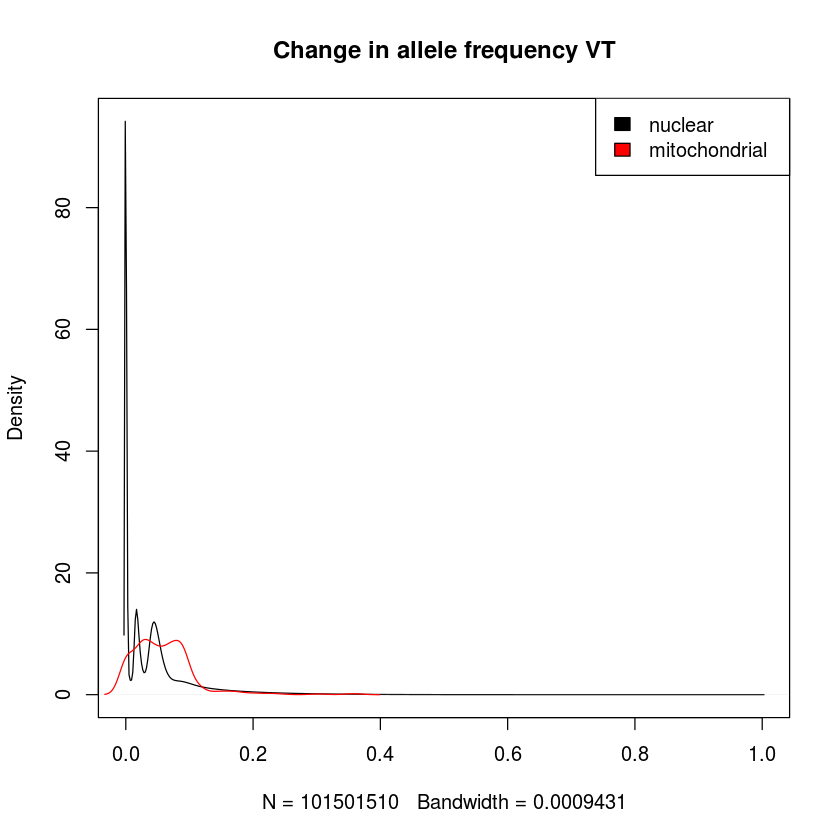

In [26]:
plot(density(vteusnps$diff), main="Change in allele frequency VT")
     lines(density(AAPE02072785vt$diff), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

In [59]:
mitonjvt=merge(AAPE02072785nj, AAPE02072785vt, by="Position")

In [61]:
NROW(mitonjvt)

[1] 455

In [66]:
mitonyvt=merge(AAPE02072785ny, AAPE02072785vt, by="Position")
NROW(mitonyvt)

[1] 268

In [67]:
mitonynj=merge(AAPE02072785ny, AAPE02072785nj, by="Position")
NROW(mitonynj)

[1] 310

In [62]:
mitonjvtny=merge(AAPE02072785ny, mitonjvt, by="Position")

In [64]:
NROW(mitonjvtny)

[1] 234

In [16]:
njeutop=njeu[order(-njeu$diff),] 

In [20]:
head(njeutop)

Scaffold,Position,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U,diff
AAPE02060630,18280,G,T,0,0e+00,14,1.000001,0.999999,6,0.999999
GL430084,1048291,T,C,0,0e+00,16,1.000002,0.999998,6,0.999998
GL429810,7526323,C,G,0,1e-06,14,1.000003,0.999999,5,0.999998
GL429818,3454116,T,C,0,1e-06,15,1.000003,0.999999,6,0.999998
GL430072,491441,A,G,0,1e-06,15,1.000000,0.999999,3,0.999998
GL429824,5793288,G,A,0,1e-06,14,1.000003,0.999998,8,0.999997


In [17]:
nyeutop=nyeu[order(-nyeu$diff),] 

In [18]:
vteutop=vteu[order(-vteu$diff),] 

In [19]:
njeutop2=njeutop[1:2188485,]

In [28]:
AAPE02072785nj

Scaffold,Position,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U,diff
AAPE02072785,2544,A,G,0.031234,0.030991,19,0.531726,0.531722,18,0.500731
AAPE02072785,9261,C,T,0.000000,0.000000,21,0.500000,0.500000,22,0.500000


In [31]:
nyeutop2=nyeutop[1:2188485,]

In [34]:
AAPE02072785ny=nyeutop2[Scaffold=="AAPE02072785",]

In [35]:
AAPE02072785ny

Scaffold,Position,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U,diff
AAPE02072785,3515,A,G,0.314975,0.314978,19,0.060067,0.020071,13,0.294907


In [30]:
vteutop2=vteutop[1:2188485,]

In [32]:
AAPE02072785vt=vteutop2[Scaffold=="AAPE02072785",]

In [33]:
AAPE02072785vt

Scaffold,Position,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U,diff
AAPE02072785,1436,T,C,0.000000,0.000000,19,0.365848,0.365849,9,0.365849
AAPE02072785,11664,C,T,0.259656,0.259656,27,0.620223,0.620223,22,0.360567
AAPE02072785,3499,A,C,0.304413,0.304412,27,0.652526,0.652524,12,0.348112
AAPE02072785,3452,C,T,0.340808,0.340810,27,0.650519,0.650517,12,0.309707
AAPE02072785,3465,G,A,0.196603,0.196603,27,0.491657,0.491651,12,0.295048
AAPE02072785,3508,T,C,0.000000,0.000000,27,0.247262,0.247260,10,0.247260


In [35]:
njnytop2=merge(njeutop2, nyeutop2, by=c("Scaffold", "Position"))

In [27]:
NROW(njnytop2)

[1] 192644

In [36]:
njnyvttop2=merge(njnytop2, vteutop2, by=c("Scaffold", "Position"))

In [29]:
NROW(njnyvttop2)

[1] 35834

In [37]:
AAPE02072785=njnyvttop2[Scaffold=="AAPE02072785",]

In [38]:
NROW(AAPE02072785)

[1] 0

In [32]:
GL429767=njnyvttop2[Scaffold=="GL429767",]

In [33]:
GL429767

Scaffold,Position,Major.x,Minor.x,KnownMaf_E.x,UnknownMaf_E.x,nInd_E.x,KnownMaf_U.x,UnknownMaf_U.x,nInd_U.x,⋯,diff.y,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U,diff
GL429767,378240,C,T,0.143361,0.050281,10,0.681577,0.681575,12,⋯,0.308775,C,T,0.328825,0.328827,13,0.644635,0.644636,15,0.315809
GL429767,2563529,A,G,0.604762,0.604761,13,0.219827,0.057143,6,⋯,0.298034,A,G,0.618599,0.618593,15,0.370621,0.370623,16,0.247970
GL429767,2900778,T,C,0.321339,0.321338,15,0.827021,0.827019,10,⋯,0.292420,T,C,0.235327,0.235169,9,0.530903,0.530906,17,0.295737
GL429767,3160344,C,A,0.650418,0.650414,19,0.239252,0.072788,7,⋯,0.280202,C,A,0.627062,0.627053,17,0.350958,0.350962,16,0.276091
GL429767,4550108,C,T,0.765996,0.765996,14,0.190930,0.190937,11,⋯,0.526260,C,T,0.557562,0.557562,15,0.246413,0.246413,13,0.311149
GL429767,4777116,G,T,0.540725,0.540721,12,0.000000,0.000004,7,⋯,0.391845,G,T,0.397839,0.091126,13,0.336501,0.336504,16,0.245378
GL429767,5088979,C,T,0.631333,0.631329,13,0.265451,0.083899,7,⋯,0.466385,C,T,0.385597,0.385600,12,0.747953,0.747955,13,0.362355
GL429767,5324740,T,C,0.288780,0.288786,12,0.924464,0.924466,11,⋯,0.284780,T,C,0.217886,0.217890,10,0.561746,0.561749,12,0.343859
GL429767,5837026,C,T,0.086096,0.025981,10,0.598133,0.598130,13,⋯,0.268136,C,T,0.060510,0.060506,14,0.428700,0.428690,12,0.368184
GL429767,6147842,T,G,0.690324,0.690326,17,0.196797,0.194171,11,⋯,0.320887,T,G,0.610119,0.610110,15,0.218141,0.218144,20,0.391966


In [ ]:


# Plot
PC <- as.data.frame(eig$vectors)
colnames(PC) <- gsub("V", "PC", colnames(PC))
PC$Pop <- factor(annot$CLUSTER)

title <- paste("PC",comp[1]," (",signif(eig$val[comp[1]], digits=3)*100,"%)"," / PC",comp[2]," (",signif(eig$val[comp[2]], digits=3)*100,"%)",sep="",collapse="")

x_axis = paste("PC",comp[1],sep="")
y_axis = paste("PC",comp[2],sep="")

ggplot() + geom_point(data=PC, aes_string(x=x_axis, y=y_axis, color="Pop")) + ggtitle(title) + scale_colour_manual(values=cbPalette)
ggsave(opt$out_file)
unlink("Rplots.pdf", force=TRUE)


In [23]:
covar =read.table("/local/home/sarahgw/WGS/SNPS/All_mylu/All_mylu_post.covar", stringsAsFact=F)
annot =read.table("/local/home/sarahgw/WGS/SNPS/All_mylu/ALL_mylu.clst", sep="\t", header=T)
comp =as.numeric(strsplit("1-2", "-", fixed=TRUE)[[1]])

In [24]:
# Eigenvalues
eig <- eigen(covar, symm=TRUE);
eig$val <- eig$val/sum(eig$val);
cat(signif(eig$val, digits=3)*100,"\n");

2.41 1.75 1.52 1.45 1.4 1.39 1.32 1.26 1.23 1.23 1.22 1.17 1.16 1.11 1.09 1.08 1.07 1.06 1.05 1.04 1.01 1.01 1 0.998 0.988 0.977 0.964 0.95 0.947 0.941 0.934 0.929 0.922 0.91 0.905 0.903 0.902 0.901 0.898 0.896 0.884 0.872 0.865 0.864 0.861 0.854 0.846 0.843 0.839 0.834 0.828 0.823 0.819 0.816 0.812 0.808 0.804 0.793 0.786 0.768 0.75 0.739 0.737 0.732 0.726 0.72 0.713 0.706 0.703 0.693 0.684 0.679 0.671 0.66 0.656 0.653 0.645 0.64 0.63 0.614 0.612 0.606 0.597 0.592 0.584 0.577 0.577 0.576 0.575 0.568 0.565 0.56 0.556 0.549 0.543 0.538 0.534 0.529 0.522 0.513 0.505 0.5 0.496 0.493 0.489 0.485 0.481 0.473 0.468 0.464 0.462 0.448 0.439 0.432 0.426 0.419 0.415 0.398 0.387 0.377 0.363 0.349 0.344 0.335 0.318 0.311 0.307 0.302 0.293 0.275 0.269 0.253 0.234 0.231 0.229 0.00259 


In [5]:
require(ggplot2)

Loading required package: ggplot2


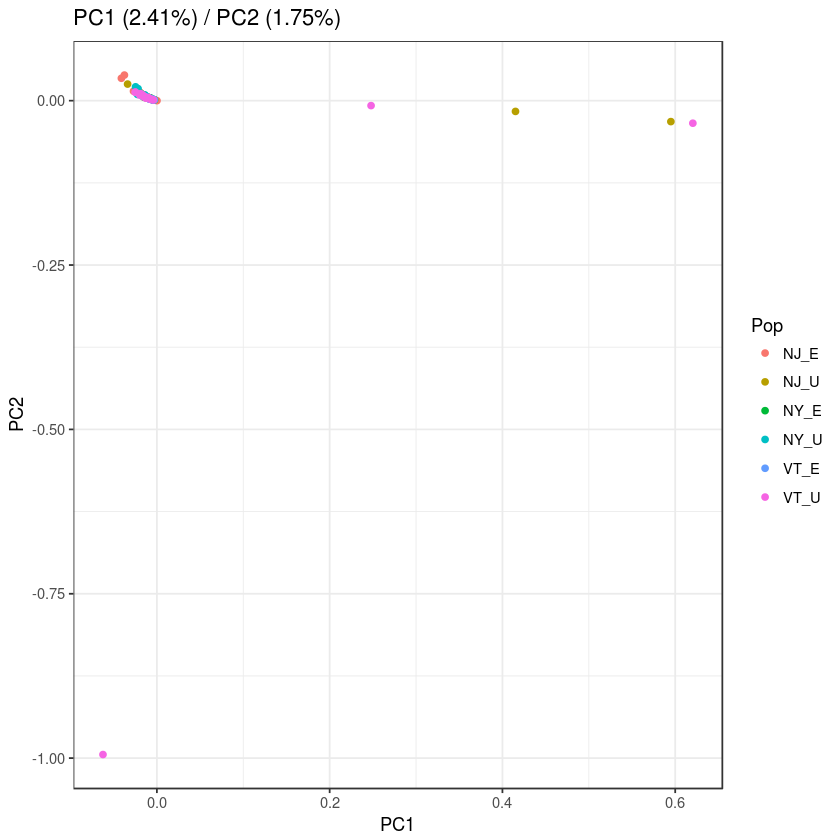

In [25]:
PC <- as.data.frame(eig$vectors)
colnames(PC) <- gsub("V", "PC", colnames(PC))
PC$Pop <- factor(annot$CLUSTER)

title <- paste("PC",comp[1]," (",signif(eig$val[comp[1]], digits=3)*100,"%)"," / PC",comp[2]," (",signif(eig$val[comp[2]], digits=3)*100,"%)",sep="",collapse="")

x_axis = paste("PC",comp[1],sep="")
y_axis = paste("PC",comp[2],sep="")

ggplot() + geom_point(data=PC, aes_string(x=x_axis, y=y_axis, color="Pop")) + ggtitle(title)+theme_bw()

In [11]:
PC

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,Pop
0.0001045627,8.742575e-06,-5.403543e-06,1.465511e-05,1.321112e-06,9.308567e-06,1.660583e-05,3.105730e-06,1.989282e-05,-1.873556e-05,⋯,3.583077e-05,7.372558e-05,4.594382e-05,-0.0000169125,-0.0000519697,1.401270e-06,-7.472238e-05,5.728101e-05,9.999999e-01,NJ_E
-0.0095141367,4.815358e-03,-3.585374e-03,3.205088e-03,5.836631e-05,3.663636e-03,7.336985e-03,-4.989783e-03,-2.328281e-04,4.573036e-04,⋯,-1.598700e-02,-1.856954e-02,-7.963892e-03,0.0118533961,0.0119510917,3.455966e-03,7.370795e-03,-8.172656e-03,1.162768e-05,NJ_E
-0.0061585496,2.624113e-03,-2.364706e-03,1.799066e-03,9.440653e-05,1.907508e-03,3.230242e-03,-2.248700e-03,-6.082239e-05,1.090549e-04,⋯,-2.377548e-02,-2.593725e-02,-1.036034e-02,0.0163232370,0.0156218492,3.871987e-03,8.819247e-03,-1.003454e-02,1.163414e-05,NJ_E
-0.0150139687,8.868360e-03,-8.818629e-03,1.880300e-03,-1.674443e-04,4.599401e-03,1.439048e-02,-1.233556e-02,-2.682577e-04,8.272755e-04,⋯,-1.394616e-02,-1.588172e-02,-6.693126e-03,0.0103124558,0.0105522076,2.880229e-03,6.214050e-03,-6.777502e-03,3.446585e-05,NJ_E
-0.0141571094,5.035983e-03,-4.477529e-03,7.444945e-03,-1.217901e-05,6.978175e-03,9.378620e-03,-4.445735e-03,-1.686785e-03,-4.648523e-04,⋯,-1.384152e-02,-1.610036e-02,-6.828180e-03,0.0104942975,0.0114814746,3.356246e-03,6.685331e-03,-7.802489e-03,3.576137e-05,NJ_E
-0.0086813276,3.953350e-03,-4.082677e-03,1.210387e-03,2.418218e-05,1.921271e-03,6.172340e-03,-4.733912e-03,-1.228756e-04,4.755672e-04,⋯,-1.909295e-02,-2.093977e-02,-8.613604e-03,0.0131123264,0.0129200485,3.426052e-03,7.414959e-03,-8.116950e-03,4.622629e-05,NJ_E
-0.0196432357,1.281108e-02,-1.336309e-02,3.024633e-03,3.827733e-04,9.488662e-03,2.742306e-02,-2.200360e-02,2.041281e-03,1.607222e-03,⋯,-1.274443e-02,-1.498536e-02,-6.612080e-03,0.0099053936,0.0099298370,2.885828e-03,5.964795e-03,-6.452900e-03,3.104853e-05,NJ_E
-0.0062647054,2.685757e-03,-2.090139e-03,1.843331e-03,-8.289116e-05,1.917626e-03,3.448495e-03,-2.251859e-03,-2.094575e-04,3.544283e-04,⋯,-2.510647e-02,-2.788025e-02,-1.164642e-02,0.0169859297,0.0167021964,4.304766e-03,9.466103e-03,-1.000257e-02,3.374206e-05,NJ_E
-0.0059948241,3.229099e-03,-2.692345e-03,5.920129e-04,-7.526546e-05,1.363982e-03,3.602041e-03,-3.062487e-03,-8.186907e-05,-1.049963e-04,⋯,-2.675027e-02,-2.944096e-02,-1.182845e-02,0.0175961743,0.0162921115,4.228100e-03,9.727529e-03,-1.013341e-02,3.395494e-05,NJ_E
-0.0131408082,6.500367e-03,-5.876479e-03,4.575823e-03,-1.994645e-04,5.312526e-03,1.048291e-02,-7.790822e-03,-5.730602e-04,-1.445941e-04,⋯,-1.417438e-02,-1.629829e-02,-6.761830e-03,0.0108246148,0.0113457075,3.013968e-03,6.735799e-03,-7.373153e-03,3.651448e-05,NJ_E


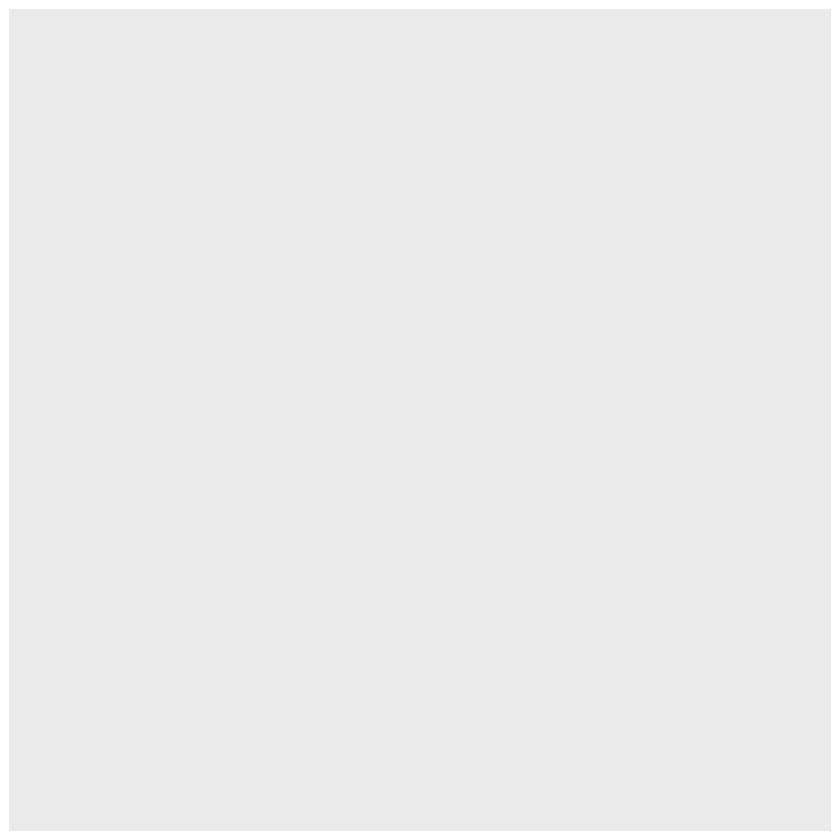

In [13]:
ggplot(data=PC, aes_string(color="Pop"))